In [18]:
Data = read.table("Project_1.dat", header = TRUE)

In [22]:
Data

uid,Area,Duration,Time
<int>,<chr>,<chr>,<int>
1,Neutral,50,25
2,Neutral,50,30
3,Neutral,50,28
4,Neutral,50,40
5,Neutral,50,20
6,Neutral,100,30
7,Neutral,100,25
8,Neutral,100,27
9,Neutral,100,35


In [20]:
Data = Data%>% mutate (Area = ifelse (Area == "1", "Neutral", ifelse(Area == "2", "AreaA", "AreaB")))

In [21]:
Data = Data%>% mutate (Duration = ifelse (Duration == "1", "50", ifelse(Duration == "2", "100", "150")))

In [23]:
library(rstatix)

# سوال یک

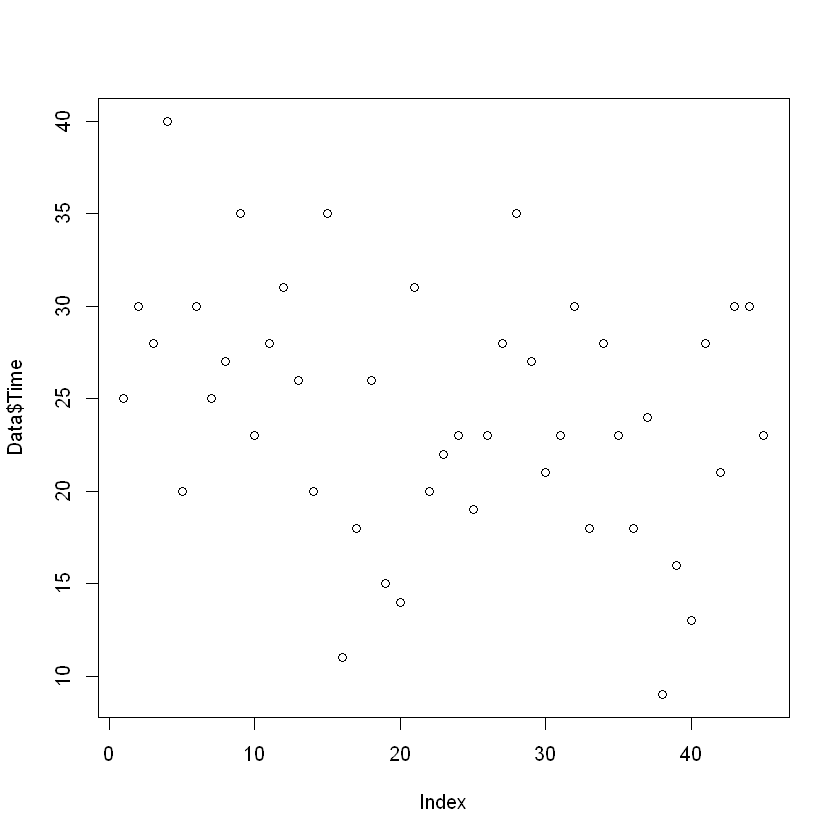

In [24]:
plot(Data$Time)

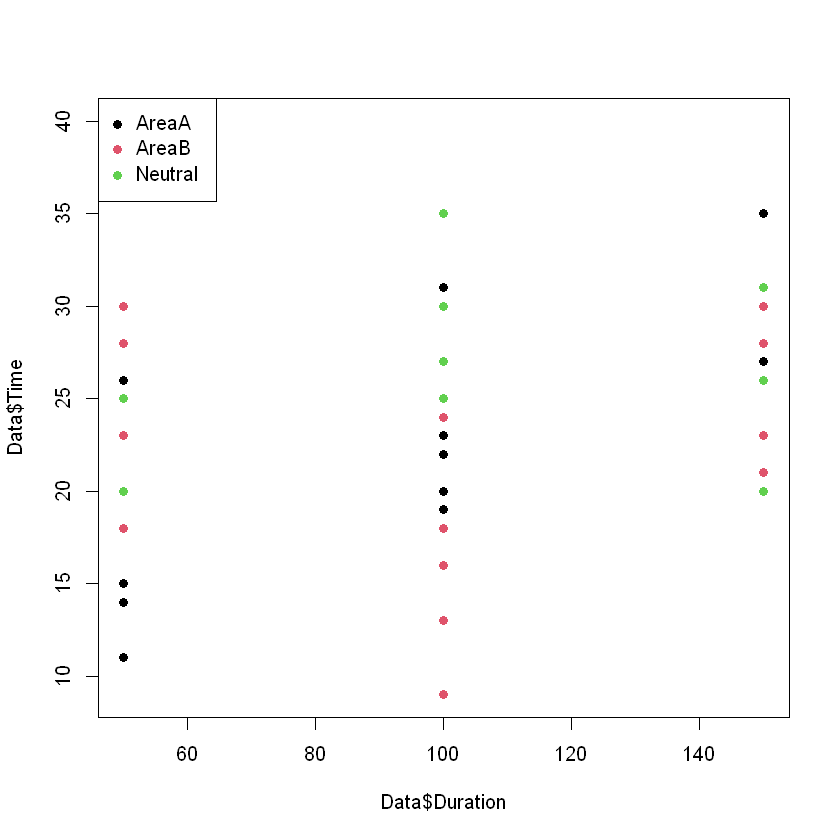

In [31]:
plot(Data$Duration, Data$Time, pch = 19, col = factor(Data$Area))
legend("topleft", legend = levels(factor(Data$Area)), pch = 19, col = factor(levels(factor(Data$Duration))))

# سوال دو

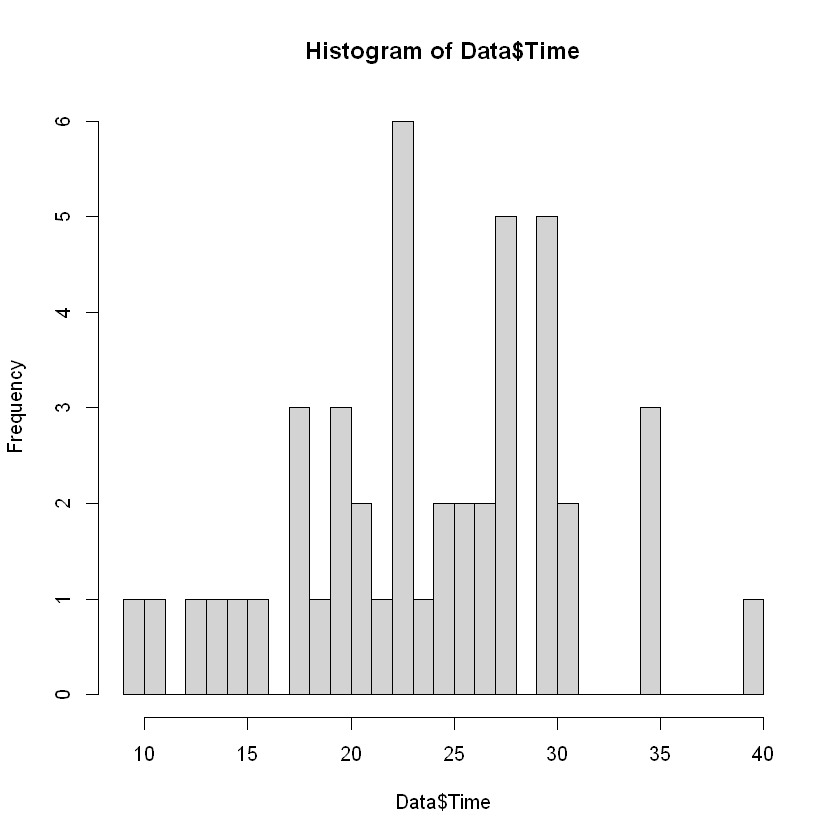

In [42]:
hist(Data$Time, breaks = 30)

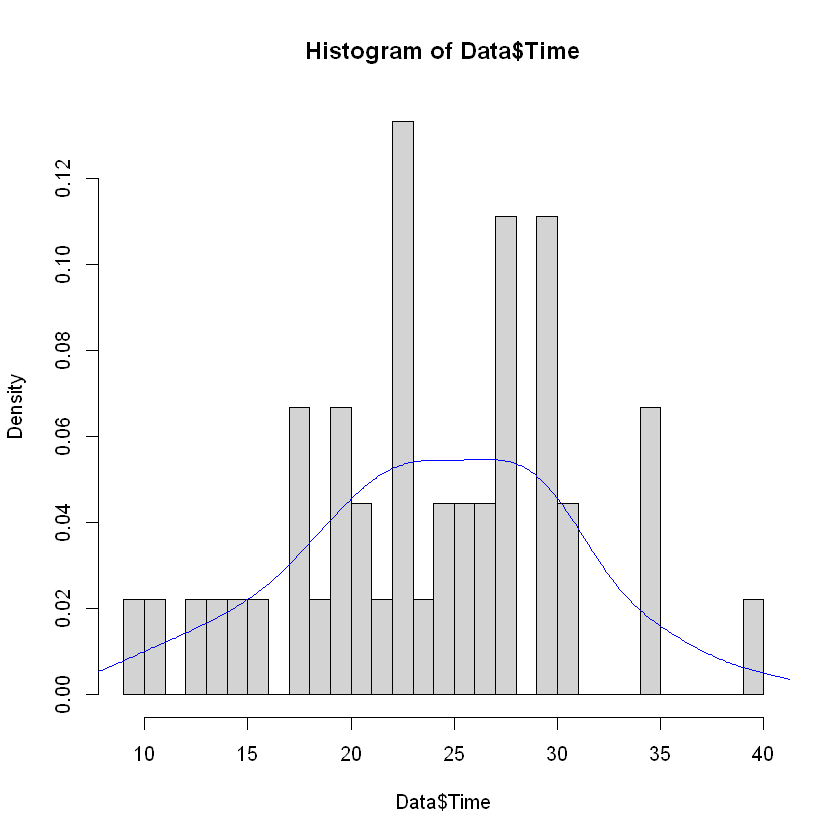

In [50]:
hist(Data$Time, breaks = 30, probability = TRUE)
lines(density(Data$Time), col = "Blue")

# سوال سه


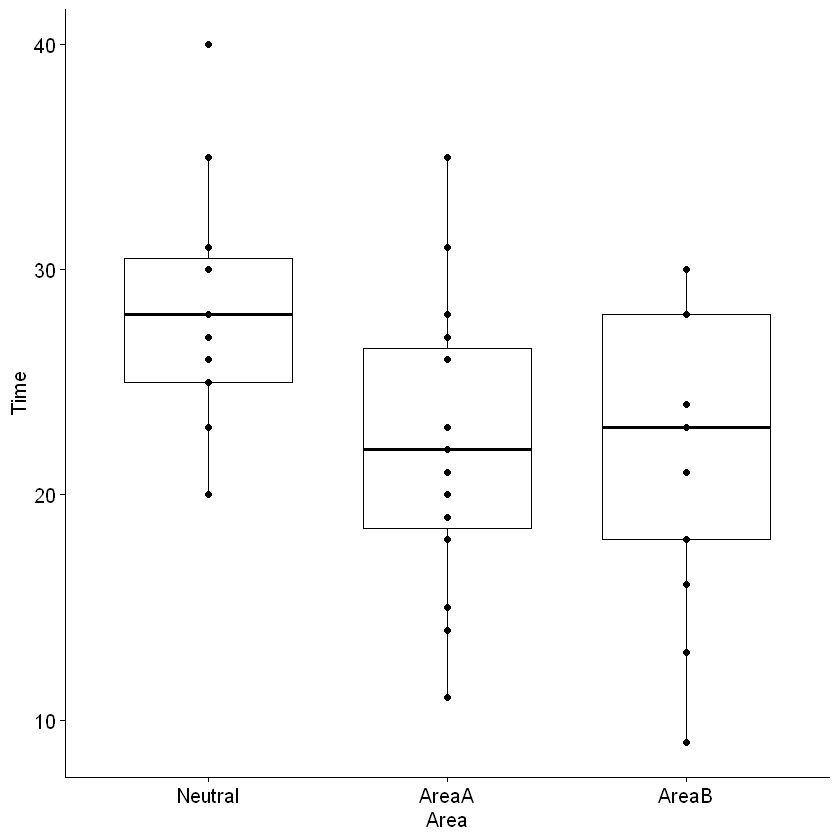

In [56]:
ggboxplot(Data, x= "Area", y = "Time", add = "point")

In [52]:
library(ggpubr)

Loading required package: ggplot2



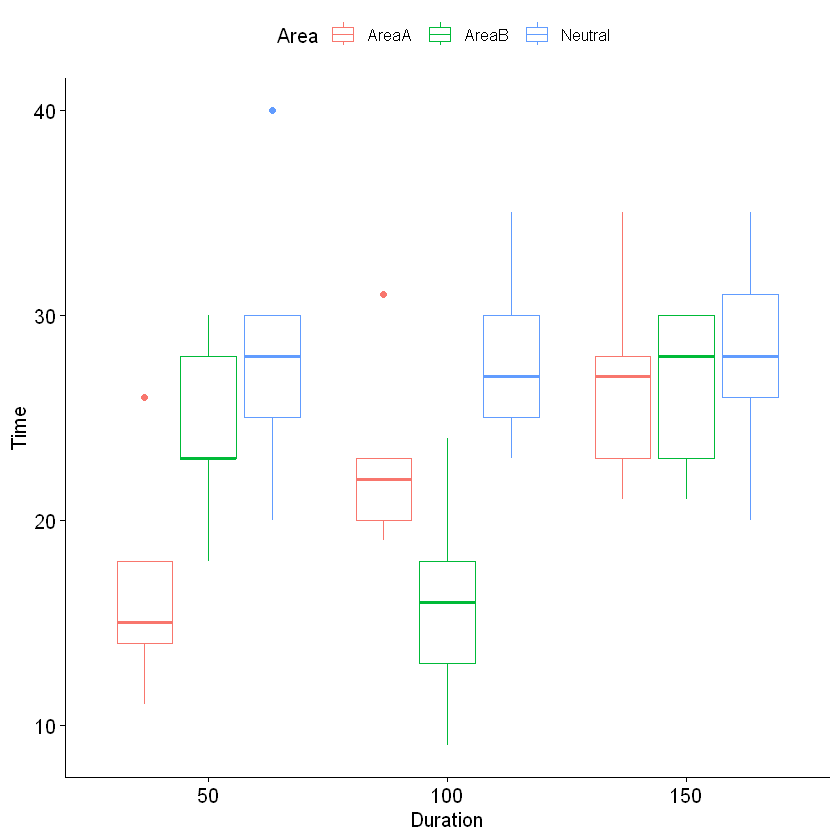

In [57]:
ggboxplot(Data, x = "Duration", y = "Time", color = "Area")

# سوال چهار

In [61]:
Data %>% group_by(Area,Duration) %>% get_summary_stats(Time)

Area,Duration,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AreaA,100,Time,5,19,31,22,20,23,3,2.965,23.0,4.743,2.121,5.890
AreaA,150,Time,5,21,35,27,23,28,5,5.930,26.8,5.404,2.417,6.710
AreaA,50,Time,5,11,26,15,14,18,4,4.448,16.8,5.718,2.557,7.100
AreaB,100,Time,5,9,24,16,13,18,5,4.448,16.0,5.612,2.510,6.969
AreaB,150,Time,5,21,30,28,23,30,7,2.965,26.4,4.159,1.860,5.164
AreaB,50,Time,5,18,30,23,23,28,5,7.413,24.4,4.722,2.112,5.863
Neutral,100,Time,5,23,35,27,25,30,5,4.448,28.0,4.690,2.098,5.824
Neutral,150,Time,5,20,35,28,26,31,5,4.448,28.0,5.612,2.510,6.969
Neutral,50,Time,5,20,40,28,25,30,5,4.448,28.6,7.403,3.311,9.192


# سوال پنجم

In [63]:
Data %>% group_by(Area,Duration) %>% identify_outliers(Time)

Area,Duration,uid,Time,is.outlier,is.extreme
<chr>,<chr>,<int>,<int>,<lgl>,<lgl>
AreaA,100,21,31,TRUE,FALSE
AreaA,50,18,26,TRUE,FALSE
Neutral,50,4,40,TRUE,FALSE


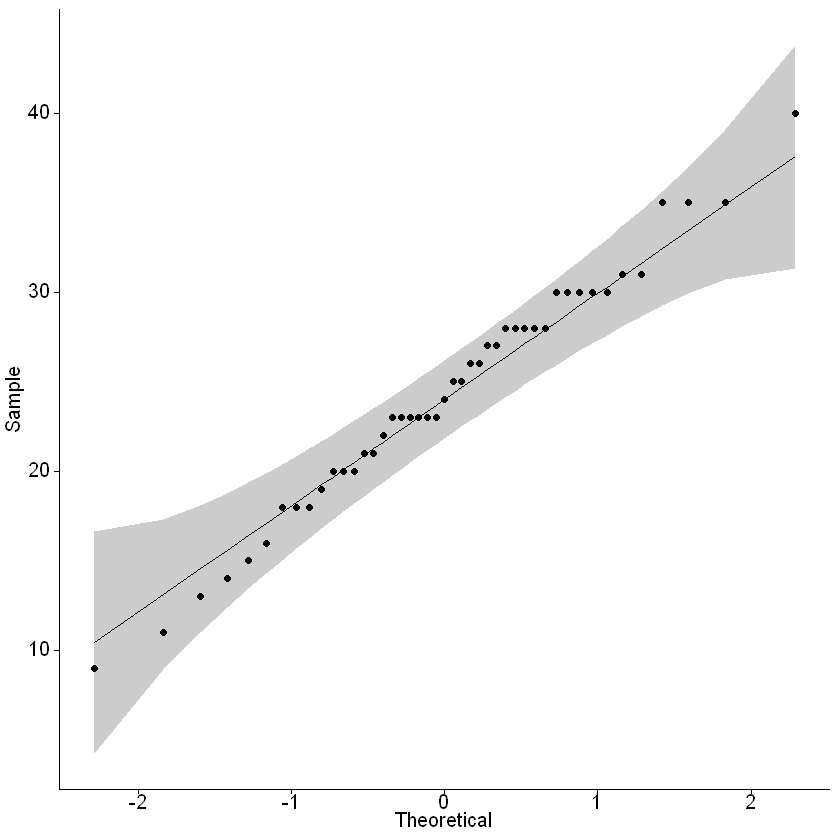

In [64]:
ggqqplot(Data$Time)

In [65]:
Data %>% group_by(Area,Duration) %>% shapiro_test(Time)

Area,Duration,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
AreaA,100,Time,0.8409519,0.1675703
AreaA,150,Time,0.9460349,0.7088551
AreaA,50,Time,0.9141809,0.4931178
AreaB,100,Time,0.9913625,0.9842414
AreaB,150,Time,0.8504109,0.1958209
AreaB,50,Time,0.9452666,0.7033700
Neutral,100,Time,0.9581566,0.7950916
Neutral,150,Time,0.9913625,0.9842414
Neutral,50,Time,0.9591148,0.8018062


# سوال ششم

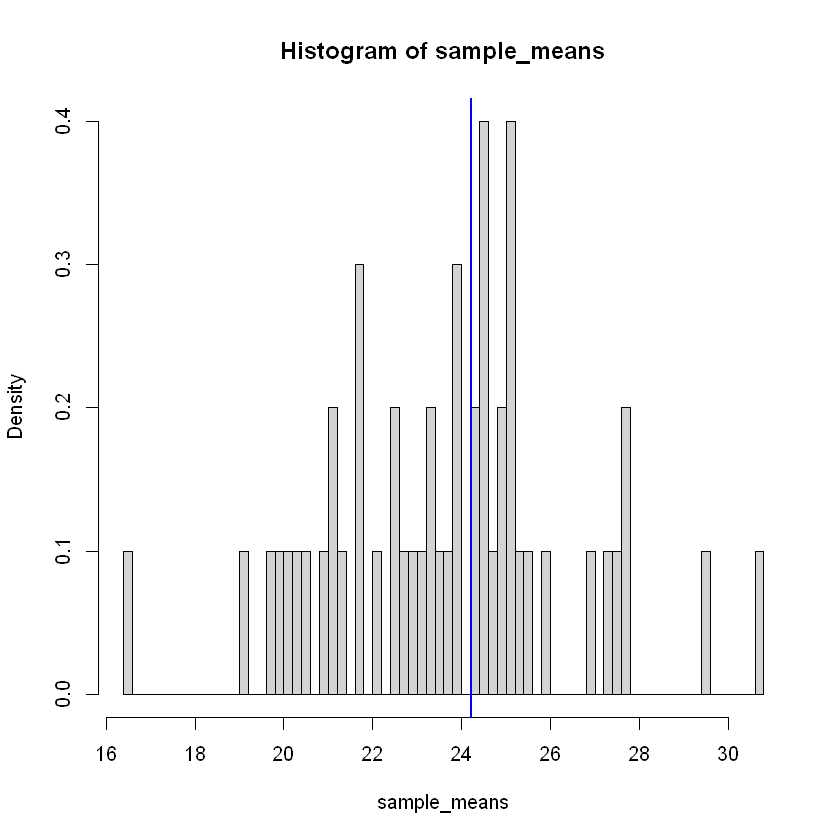

In [74]:
samples = replicate(50, sample(Data$Time, 5))
sample_means = apply(samples, 2, mean)
hist(sample_means, breaks = 100, probability = TRUE)
population_mean = mean(Data$Time)
abline(v = population_mean, col = "blue", lwd = 2)

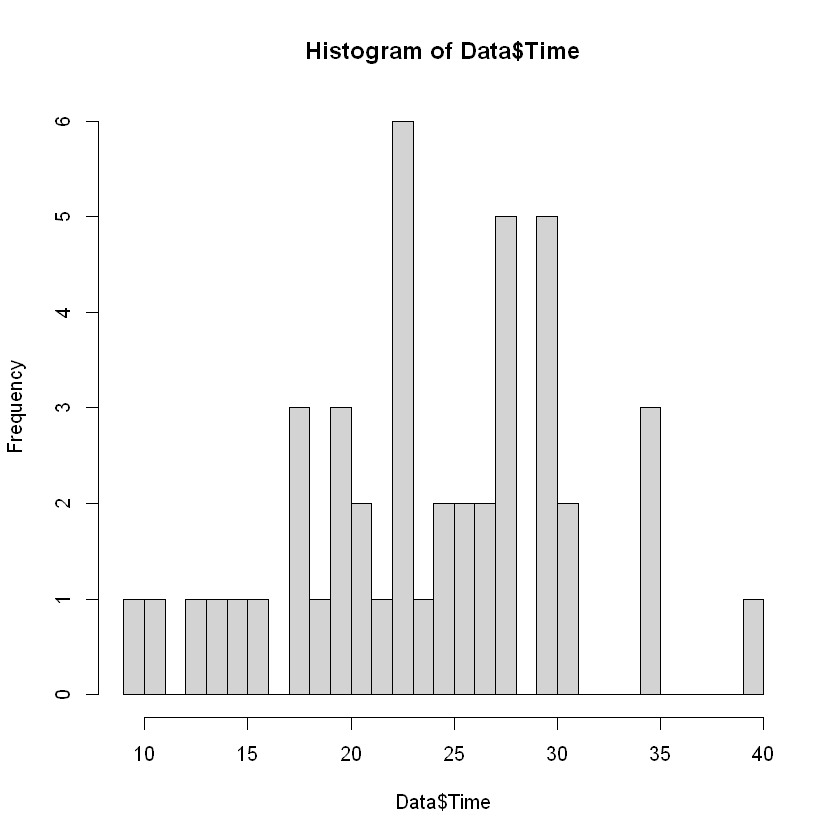

In [69]:
hist(Data$Time, breaks = 30)

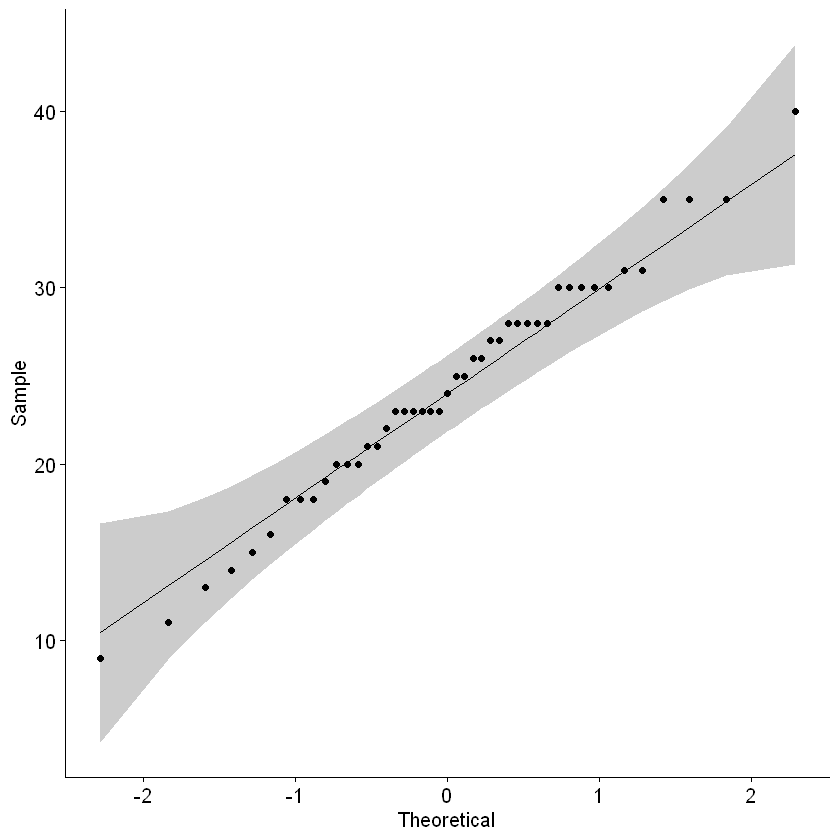

In [75]:
ggqqplot(Data$Time)

# سوال 9

In [91]:
Data %>% levene_test(Time ~ Duration * Area)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
8,36,0.1355422,0.9970647


In [76]:
anova_test(Data, Time ~ Area * Duration)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Area,2,36,6.074,0.005,*,0.252
2,Duration,2,36,3.217,0.052,,0.152
3,Area:Duration,4,36,3.172,0.025,*,0.261


# آزمون های تعقیبی

In [88]:
Data %>% group_by(Area) %>% anova_test(Time ~ Duration)

,Area,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,AreaA,Duration,2,12,4.528,0.034,*,0.430
2,AreaB,Duration,2,12,6.425,0.013,*,0.517
3,Neutral,Duration,2,12,0.017,0.984,,0.003


In [85]:
Data %>% group_by(Duration) %>% emmeans_test(Time ~ Area, p.adjust.method = "bonferroni")

,Duration,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,100,Area,Time,AreaA,AreaB,36,2.0443342,0.048287184,0.144861551,ns
2,100,Area,Time,AreaA,Neutral,36,-1.4602387,0.152897216,0.458691648,ns
3,100,Area,Time,AreaB,Neutral,36,-3.5045730,0.001243002,0.003729006,**
4,150,Area,Time,AreaA,AreaB,36,0.1168191,0.907652697,1.000000000,ns
5,150,Area,Time,AreaA,Neutral,36,-0.3504573,0.728037926,1.000000000,ns
6,150,Area,Time,AreaB,Neutral,36,-0.4672764,0.643118245,1.000000000,ns
7,50,Area,Time,AreaA,AreaB,36,-2.2195629,0.032836378,0.098509134,ns
8,50,Area,Time,AreaA,Neutral,36,-3.4461634,0.001462476,0.004387428,**
9,50,Area,Time,AreaB,Neutral,36,-1.2266005,0.227935062,0.683805185,ns
